In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26205 entries, 0 to 26204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   26205 non-null  int64  
 1   monto                26205 non-null  int64  
 2   ppm2                 26200 non-null  float64
 3   superficie_t         26205 non-null  float64
 4   superficie_u         25974 non-null  float64
 5   terraza              26205 non-null  float64
 6   dormitorios          25504 non-null  float64
 7   banos                23893 non-null  float64
 8   estacionamiento      26205 non-null  int64  
 9   bodegas              26205 non-null  int64  
 10  cantidad_pisos       16156 non-null  float64
 11  piso                 16110 non-null  float64
 12  tipo_depto           26205 non-null  object 
 13  antiguedad           26205 non-null  float64
 14  latitud              26205 non-null  float64
 15  longitud             26205 non-null 

In [3]:
df['antiguedad'].unique()

array([  1.,   2.,   6.,   0.,  26.,  21.,  30.,  13.,  29.,  16.,  24.,
        45.,  nan,  27.,  22.,  10.,  37.,  35.,  53.,  31.,  12.,  28.,
         5.,   9.,  11.,  46.,  55.,  20.,  56.,  50.,  18.,  36.,  23.,
         3.,  49.,  43.,  25.,  59.,  15.,   7.,   4.,   8.,  47.,  14.,
        34.,  33.,  42.,  19.,  17.,  70.,  80.,  51.,  60.,  38.,  32.,
        44.,  65.,  62., 125.,  75.,  95.,  90.,  40.,  54.,  67.,  39.,
        73.,  61.,  68.,  74., 114.,  85., 124.,  58.,  52.,  79.,  66.,
        69.,  78.,  88.,  41.,  48.,  57.,  63.,  77.,  76.,  72.,  64.,
        91.,  84.,  83.,  86.,  71.,  81.,  99., 105.,  89., 100.,  87.,
       122.,  82., 110.,  92.,  96., 209.])

In [5]:
# Crear la columna binaria 'antiguedad_faltante'
# Será 1 donde la 'antiguedad' original era NaN, y 0 en caso contrario.
df['antiguedad_faltante'] = df['antiguedad'].isna().astype(int)

In [7]:
# Calcular la mediana de la columna 'antiguedad'
# Se calcula antes de cualquier redondeo para mayor precisión
mediana_antiguedad = df['antiguedad'].median()

# Rellenar los valores NaN en 'antiguedad' con la mediana calculada
df['antiguedad'] = df['antiguedad'].fillna(mediana_antiguedad)

In [9]:
df['antiguedad'] = df['antiguedad'].round(0)

# Convertir la columna 'antiguedad' a tipo entero (int)
# Esto es seguro ahora que no hay NaNs y todos son números enteros o se han redondeado.
df['antiguedad'] = df['antiguedad'].astype(int)

In [10]:
df['antiguedad'].unique()

array([  1,   2,   6,   0,  26,  21,  30,  13,  29,  16,  24,  45,   9,
        27,  22,  10,  37,  35,  53,  31,  12,  28,   5,  11,  46,  55,
        20,  56,  50,  18,  36,  23,   3,  49,  43,  25,  59,  15,   7,
         4,   8,  47,  14,  34,  33,  42,  19,  17,  70,  80,  51,  60,
        38,  32,  44,  65,  62, 125,  75,  95,  90,  40,  54,  67,  39,
        73,  61,  68,  74, 114,  85, 124,  58,  52,  79,  66,  69,  78,
        88,  41,  48,  57,  63,  77,  76,  72,  64,  91,  84,  83,  86,
        71,  81,  99, 105,  89, 100,  87, 122,  82, 110,  92,  96, 209])

C:\Users\Pc-ADS\AppData\Local\Temp\ipykernel_11604\1324417780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_antiguedad.index, y=frecuencia_antiguedad.values, palette='viridis')


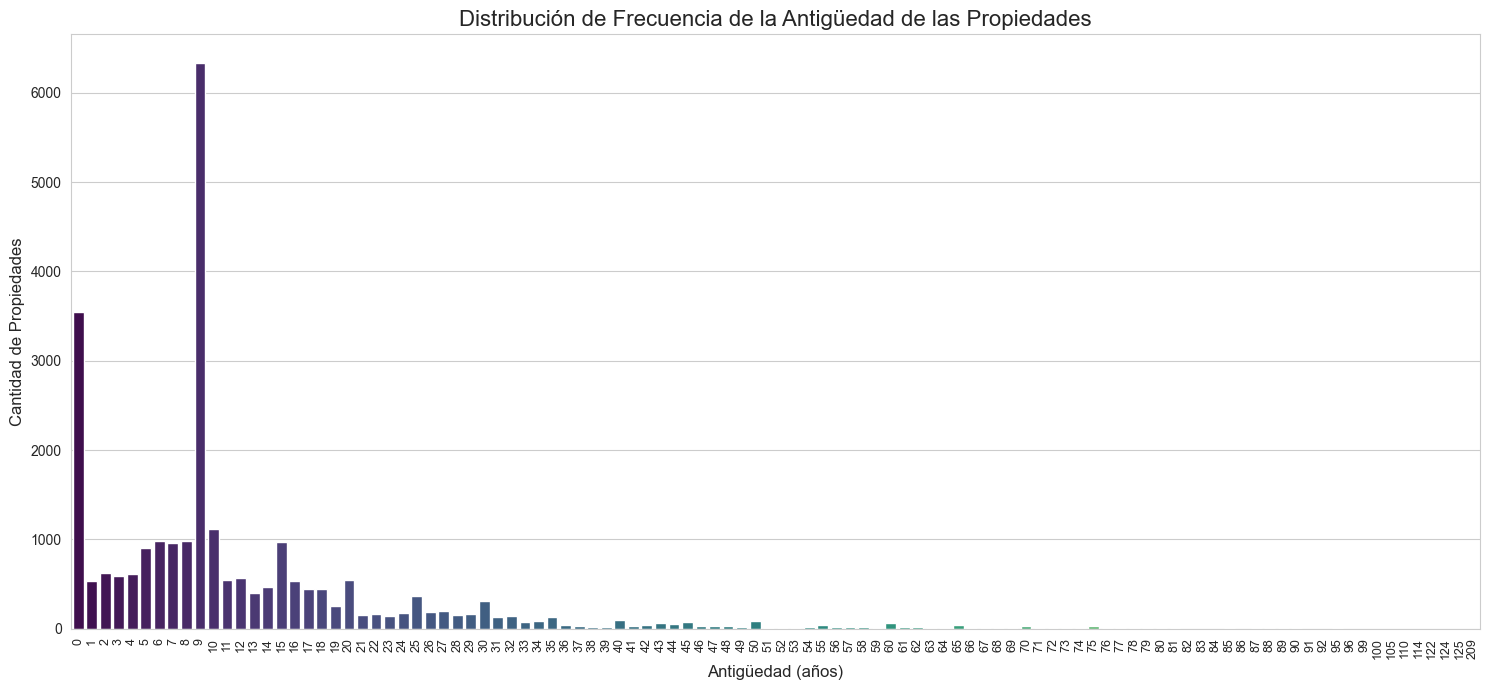

In [11]:
frecuencia_antiguedad = df['antiguedad'].value_counts().sort_index()

# 2. Configurar el estilo del gráfico para una mejor apariencia
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7)) # Ajusta el tamaño para acomodar muchas barras

# 3. Crear el gráfico de barras
sns.barplot(x=frecuencia_antiguedad.index, y=frecuencia_antiguedad.values, palette='viridis')

# 4. Añadir títulos y etiquetas
plt.title('Distribución de Frecuencia de la Antigüedad de las Propiedades', fontsize=16)
plt.xlabel('Antigüedad (años)', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)

# 5. Rotar las etiquetas del eje X a 90 grados
plt.xticks(rotation=90, ha='center', fontsize=9) # 'ha'='center' para centrar la etiqueta

# 6. Ajustar el diseño y mostrar el gráfico
plt.tight_layout() # Ajusta automáticamente los parámetros del plot para un layout ajustado
plt.show()

In [13]:
df.to_csv('Datasets\deptos_en_limpieza.csv', index=False)

### Validez del Método de Imputación para la Variable 'Antigüedad'

Para la variable 'antigüedad', que presentaba una proporción significativa de valores faltantes (aproximadamente 21.8%), se optó por una estrategia de imputación doblemente robusta: el relleno de los valores nulos con la **mediana** de la columna, y la creación de una **columna indicadora binaria (`antiguedad_faltante`)** que señala explícitamente qué registros contenían datos ausentes originalmente. Si bien la imputación por mediana puede introducir un pico en la distribución de frecuencias, la ventaja primordial de este método radica en su **capacidad para preservar la integridad del dataset**, manteniendo todas las observaciones sin descartar información potencialmente valiosa de otras columnas. Crucialmente, la columna `antiguedad_faltante` permite a los modelos de aprendizaje automático discernir entre los valores de antigüedad reales y los imputados, capacitándolos para aprender si la *ausencia de la información original* posee un valor predictivo intrínseco sobre el precio del inmueble, mitigando así el riesgo de sesgos y aprovechando al máximo los datos disponibles.